In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

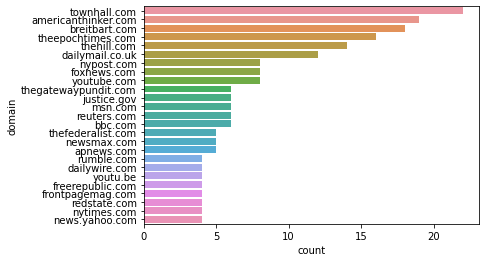

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

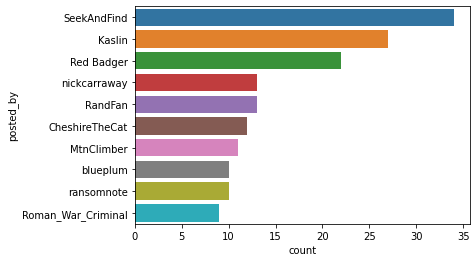

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain                                  
                                   count unique                   top freq
domain               posted_by                                            
americanthinker.com  Kaslin            6      1   americanthinker.com    6
                     MtnClimber        7      1   americanthinker.com    7
                     SeekAndFind       5      1   americanthinker.com    5
apnews.com           SeekAndFind       1      1            apnews.com    1
                     RandFan           2      1            apnews.com    2
bbc.com              SeekAndFind       1      1               bbc.com    1
                     RandFan           1      1               bbc.com    1
                     nickcarraway      1      1               bbc.com    1
breitbart.com        Red Badger        2      1         breitbart.com    2
foxnews.com          SeekAndFind       1      1           foxnews.com    1
                     Red Badger        1      1           foxnews.com    1
justice.gov          ransomnote        6      1           justice.gov    6
msn.com              nickcarraway      1      1               msn.com    1
                     blueplum          1      1               msn.com    1
nypost.com           nickcarraway      2      1            nypost.com    2
nytimes.com          RandFan           1      1           nytimes.com    1
redstate.com         SeekAndFind       3      1          redstate.com    3
reuters.com          blueplum          2      1           reuters.com    2
theepochtimes.com    SeekAndFind       2      1     theepochtimes.com    2
thefederalist.com    Kaslin            3      1     thefederalist.com    3
                     SeekAndFind       2      1     thefederalist.com    2
thegatewaypundit.com Red Badger        1      1  thegatewaypundit.com    1
thehill.com          RandFan           7      1           thehill.com    7
                     blueplum          2      1           thehill.com    2
townhall.com         Kaslin           16      1          townhall.com   16
                     SeekAndFind       2      1          townhall.com    2

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
